## Time series analysis :  Part 1  - Stationart 


### 1) Definition : 
Time series are stationary if they *** do not have trend or seasonal effects ***. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.
( The observations in a stationary time series are not dependent on time.)
 *  *** When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective. ***
 
 
### 2) Methods :


###   Stationary Time Series VS. Non- Stationary Time Series

* Stationary Time Series :  
 


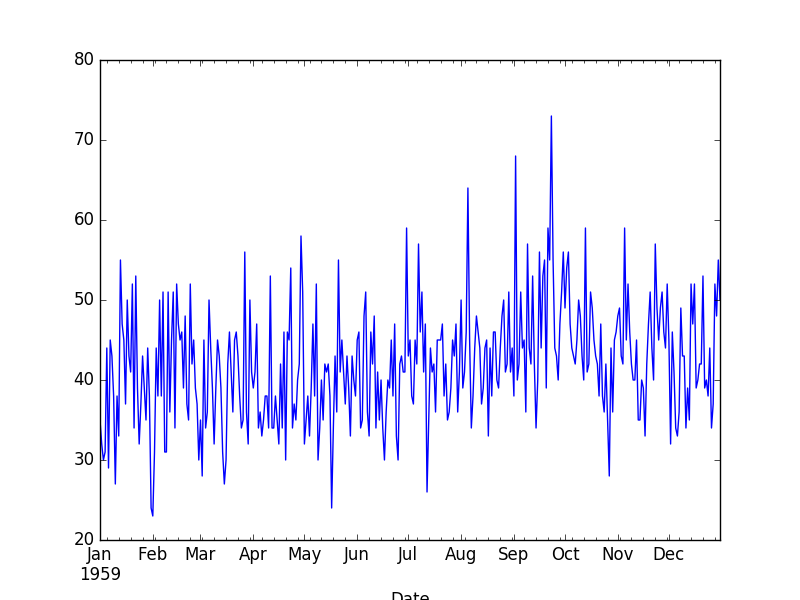

* Non- Stationary Time Series  : 


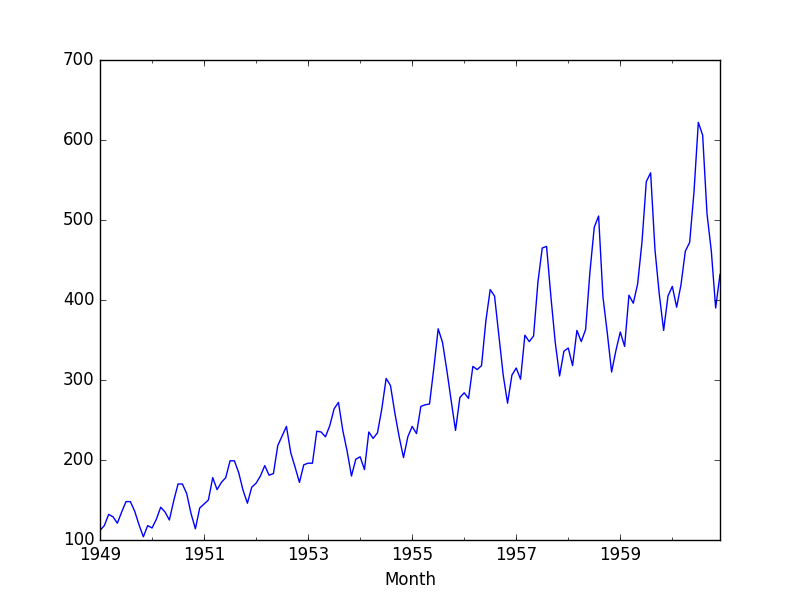

In [24]:
from IPython.display import display
print ('* Stationary Time Series :  ')
print (' ')
display(Image(filename='stationary_timeseries.png'))

print ('* Non- Stationary Time Series  : ')
display(Image(filename='non_stationary_timeseries.png'))


In [20]:
ls

AB_Testing_part1.ipynb         Time_Series_part1.ipynb
AB_Testing_part2.ipynb         non_stationary_timeseries.png
Bernoulli_distribution.ipynb   quarterly-sp-500.csv
Confidence_Intervals.ipynb     stationary_timeseries.png
FB.csv                         train.csv*


In [15]:
# ref 
# https://github.com/omoju/Fundamentals/blob/master/Data/data_time_Series_1.ipynb
# https://machinelearningmastery.com/time-series-data-stationary-python/

In [22]:
# Import libraries
from __future__ import absolute_import, division, print_function


from IPython.display import Image, display

# OP 
import pandas as pd
import numpy as np
import math
from scipy import stats
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams
from IPython.display import display

Populating the interactive namespace from numpy and matplotlib


In [3]:
# set plot style
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,10)

In [4]:
# help func 

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    """
    Generate rolling statistic plot 
    
    Attributes
    ----------
    timeseries: pandas series
    """
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

def Dickey_Fuller(timeseries):
    """
    Perform Dickey Fuller test for stationarity on the a timeseries
    
    Attributes
    ----------
    timeseries: pandas series
    """
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 0) Load data 

In [6]:
df_fb = pd.read_csv('FB.csv')
df_fb_ = df_fb[['Date', ' Open', ' High', ' Low', ' Close', ' Volume']]

In [7]:
df_fb_.head(1)

,Date,Open,High,Low,Close,Volume
0,2018-04-12,166.98,167.45,163.1,163.87,38262956


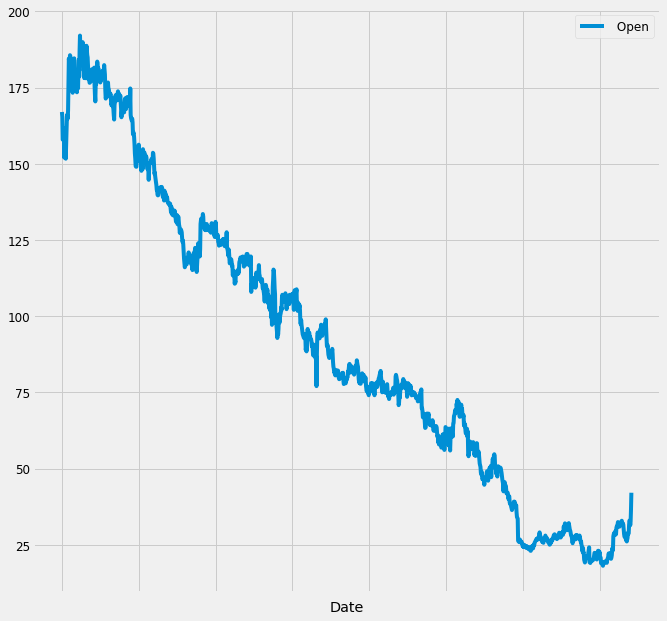

In [9]:
df_fb_[['Date', ' Open']].set_index('Date').plot()

## 1) Check time-series stationarity

/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/yennanliu/anaconda3/envs/ds_dash/lib/python3.5/site-packages/ipykernel/__main__.py:16: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


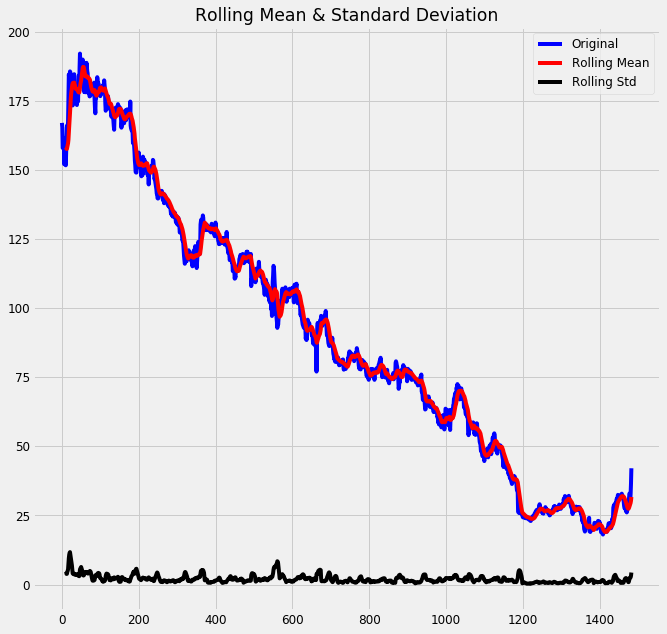

In [12]:
test_stationarity(df_fb_[' Open'])

In [14]:
Dickey_Fuller(df_fb_[' Open'])

Results of Dickey-Fuller Test:
Test Statistic                   -0.835332
p-value                           0.808523
#Lags Used                       10.000000
Number of Observations Used    1473.000000
Critical Value (5%)              -2.863504
Critical Value (10%)             -2.567816
Critical Value (1%)              -3.434797
dtype: float64


In [13]:
df_fb_[['Date', ' Open']].head(3)

,Date,Open
0,2018-04-12,166.98
1,2018-04-11,165.36
2,2018-04-10,157.93
